In [61]:
from PIL import Image
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import array_to_img
from keras.preprocessing.image import save_img
from imutils import paths
import matplotlib.pyplot as plt
import argparse
import time
import sys
import cv2
import os
from scipy import ndimage, misc
import scipy.misc
from numpy import zeros
from PIL import Image
import numpy as np # linear algebra
import pandas as pd
from os import listdir
from tkinter import filedialog
from tkinter import *
from IPython.display import Image as _Imgdis
from scipy import ndimage
import imagehash
from skimage import color
from skimage import io

In [20]:
root = Tk()
root.withdraw()
folder_selected = filedialog.askdirectory()
print(folder_selected)
list=[]
l=os.listdir(folder_selected)

/home/darshan/INTERN IIITA/nn/code/data


In [65]:

images = []
for file in os.listdir(folder_selected):
    if file.endswith(".jpeg") or file.endswith('.png'):
        img=io.imread(folder_selected+'/'+file,as_gray=True)
        img=misc.imresize(img, (64, 64))
        images.append(img)
        height,width=img.shape
        img=np.asarray(img)
        img1=zeros([height,width])
        for x in range(height):
            for y in range(width):
                img1[x][y]=int(img1[x][y])^int(img[x][y])
scipy.misc.imsave('test1.png',img1)
print(images)

[array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       ...,
       [116, 117, 122, ...,   0,   0,   0],
       [122, 122, 122, ...,   0,   0,   0],
       [122, 121, 119, ...,   0,   0,   0]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)]


/home/darshan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.3.0.
Use Pillow instead: ``numpy.array(Image.fromarray(arr).resize())``.
  """
/home/darshan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.
  del sys.path[0]


['vine-1948358__340.png', 'water-2748640__340.png', 'white-wings-2473023__340.png']
Working with 3 images
Image examples: 


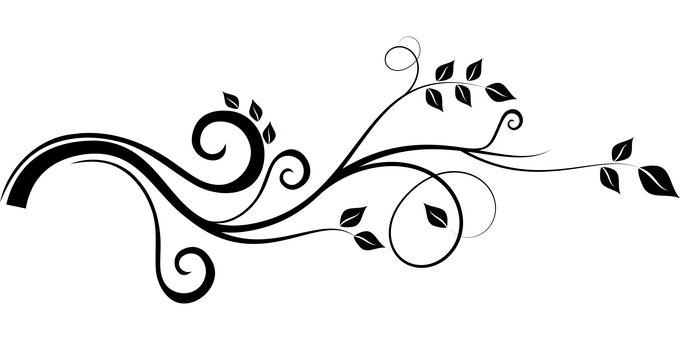

AttributeError: type object 'Image' has no attribute 'open'

In [24]:
onlyfiles = [f for f in os.listdir(folder_selected) if f.endswith(".jpg") or f.endswith(".png")]
print(onlyfiles)
print("Working with {0} images".format(len(onlyfiles)))
print("Image examples: ")
for i in range(len(onlyfiles)):
    display(_Imgdis(filename=folder_selected + "/" + onlyfiles[i], width=240, height=320))
    img=Image.open(onlyfiles[i]).convert('L')
    hash = imagehash.average_hash(img)
    print(hash)

In [123]:
from scipy import ndimage
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

train_files = []
i=0
for _file in onlyfiles:
    train_files.append(_file)
    label_in_file = _file.find("_")
    
print("Files in train_files: %d" % len(train_files))

# Original Dimensions
image_width = 640
image_height = 480
ratio = 4

image_width = int(image_width / ratio)
image_height = int(image_height / ratio)

channels = 3
nb_classes = 1

dataset = np.ndarray(shape=(len(train_files), channels, image_height, image_width),dtype=np.float32)

i = 0
for _file in train_files:
    img = load_img(folder_selected + "/" + _file)  # this is a PIL image
    img.thumbnail((image_width, image_height))
    # Convert to Numpy Array
    #x=np.asarray( img, dtype="int32" )
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    x = img_to_array(img)  
    x = x.reshape((3, 120, 160))
    # Normalize
    x = (x - 128.0) / 128.0
    dataset[i] = x
    i += 1
    if i % 250 == 0:
        print("%d images to array" % i)
print("All images to array!")

Files in train_files: 1


TypeError: src is not a numpy array, neither a scalar